In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime as dt import datetime
ad_systems_accounts = pd.read_csv('C:/Users/Sergey/Desktop/jupyter/Test task for product analyst/ad_systems_accounts.csv', sep = ',')
exchange_rates = pd.read_csv('C:/Users/Sergey/Desktop/jupyter/Test task for product analyst/exchange_rates.csv', sep = ',')
transfers_to_ad_systems = pd.read_csv('C:/Users/Sergey/Desktop/jupyter/Test task for product analyst/transfers_to_ad_systems.csv', sep = ',')
users_registrations = pd.read_csv('C:/Users/Sergey/Desktop/jupyter/Test task for product analyst/users_registrations.csv', sep = ',')

###  1) Сумма выручки (итого + структура)

In [2]:
# структура
transfers_to_ad_systems.groupby('ad_system').agg({'price': 'sum'})

,price
ad_system,
facebook,"16,623,937,987.20"
google,"15,719,739,315.26"
mytarget,"16,596,263,902.19"
vkontakte,"14,376,153,938.60"
yandex,"17,147,279,924.94"


In [3]:
# итого
transfers_to_ad_systems.price.sum()

80463375068.18999

<Axes: xlabel='ad_system'>

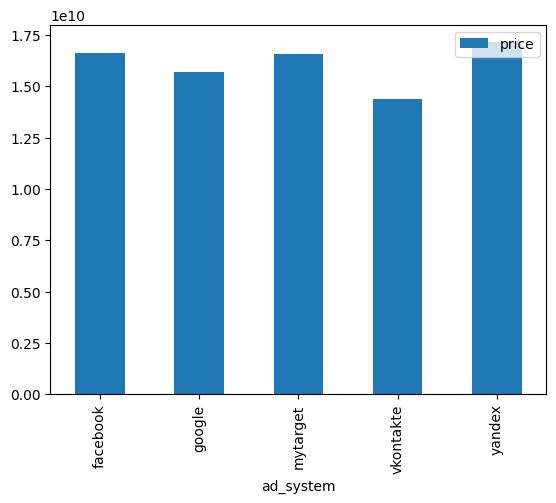

In [4]:
# структура диаграммой
t = transfers_to_ad_systems.groupby('ad_system').agg({'price': 'sum'})
t.plot(kind="bar")

### 2) Кол-во пользователей

In [5]:
ad_systems_accounts.user_id.count()

22263

### 3) Средний чек


In [6]:
(transfers_to_ad_systems.price.sum())/(transfers_to_ad_systems.user_id.count())

150815.75995732125

### 4) Величина оттока (churn rate) - методику расчета определяете сами


Формула Churn Rate включает:

С1 — количество клиентов, которые есть в базе данных на начало расчетного периода;

С2 — численность аудитории на конец периода;

С3 — количество новых клиентов, которые добавились за расчетный период.

cr = (c1+c3-c2)/c1


In [8]:
#Дату из текста в timestamp
transfers_to_ad_systems.date_payed = pd.to_datetime(transfers_to_ad_systems['date_payed'])

In [9]:
C1 = ad_systems_accounts[(ad_systems_accounts['account_date_created'] >= '2018-01-01') & (ad_systems_accounts['account_date_created'] < '2018-06-01')].user_id.count()
C2 = ad_systems_accounts[(ad_systems_accounts['account_date_created'] >= '2018-06-01') & (ad_systems_accounts['account_date_created'] < '2019-01-01')].user_id.count()
C3 = users_registrations[(users_registrations['user_date_registration'] >= '2018-01-01') & (users_registrations['user_date_registration'] < '2019-01-01')].user_id.count()

In [10]:
cr = ((C1+C3-C2)/C1)*100
cr

83.53444920202413

Приток составил 83.53%

### 5) Когорта по дате регистрации юзера по выручке

Когорта – это группа пользователей, имеющих общее свойство

In [11]:
K_Reg_User = transfers_to_ad_systems.merge(users_registrations, on = 'user_id', how='left')
#Дату из timestamp в date
K_Reg_User['date_payed'] = pd.to_datetime(K_Reg_User['date_payed']).dt.date
#Дату из timestamp в date
K_Reg_User['user_date_registration'] = pd.to_datetime(K_Reg_User['user_date_registration']).dt.date
K_Reg_User

,user_id,ad_system,account_id,date_payed,price,currency,user_date_registration,user_country,utm_medium,utm_source,utm_campaign
0,3848,facebook,161288,2019-05-17,"241,012.00",RUB,2018-10-03,RUS,organic,go.mail.ru,(not set)
1,881,vkontakte,161552,2019-06-03,"242,859.00",RUB,2017-02-18,ARM,cpc,mytarget,campaign_101
2,881,vkontakte,161552,2018-09-10,"140,201.00",RUB,2017-02-18,ARM,cpc,mytarget,campaign_101
3,881,vkontakte,161552,2018-08-08,"103,900.53",RUB,2017-02-18,ARM,cpc,mytarget,campaign_101
4,11353,facebook,161786,2019-05-22,"290,783.00",RUB,2018-01-06,ARM,referral,example_site_39,(not set)
...,...,...,...,...,...,...,...,...,...,...,...
533516,977,mytarget,183263,2018-08-03,"233,700.00",RUB,2017-07-17,KGZ,cpc,telegram,campaign_113
533517,977,mytarget,183263,2019-07-01,"68,356.32",RUB,2017-07-17,KGZ,cpc,telegram,campaign_113
533518,977,mytarget,183263,2019-01-30,"213,481.00",RUB,2017-07-17,KGZ,cpc,telegram,campaign_113
533519,977,mytarget,183263,2018-09-10,"135,096.00",RUB,2017-07-17,KGZ,cpc,telegram,campaign_113


In [12]:
K_Reg_User.groupby('user_date_registration').agg({'price': 'sum'})

,price
user_date_registration,
2017-01-01,"48,476,581.18"
2017-01-02,"50,399,735.29"
2017-01-03,"87,838,756.26"
2017-01-04,"53,144,148.05"
2017-01-05,"91,943,068.58"
...,...
2019-06-11,"38,128,754.97"
2019-06-12,"136,603,296.86"
2019-06-13,"88,960,295.03"


<Axes: xlabel='user_date_registration', ylabel='price'>

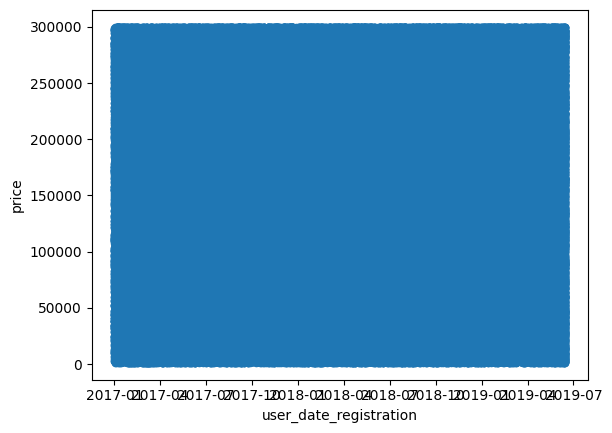

In [13]:
K_Reg_User.plot.scatter(x='user_date_registration',y='price')

In [ ]:
K_Reg_User.plot(kind="bar")

In [ ]:
K_Reg_User.plot()

In [ ]:
sns.heatmap(K_Reg_User.drop('user_date_registration', axis=1).corr(), annot=True, cmap= 'coolwarm')

Не хватает мощности пк обработать эти данные :)

Запустив 3 кода выше, будут различные графики по таблице K_Reg_User.

### 6) Когорта по дате регистрации юзера по кол-ву пользователей

In [14]:
K_Reg_User.groupby('user_date_registration').agg({'user_id': 'count'})

,user_id
user_date_registration,
2017-01-01,323
2017-01-02,318
2017-01-03,599
2017-01-04,356
2017-01-05,602
...,...
2019-06-11,251
2019-06-12,879
2019-06-13,595


In [16]:
# K_Reg_User.plot(kind="bar")
# K_Reg_User.plot()
# sns.heatmap(K_Reg_User.drop('user_date_registration', axis=1).corr(), annot=True, cmap= 'coolwarm')

 # Все тоже самое что выше, не хватает мощности пк нарисовать эти графики :D
 # т.к. я их не запускал, могут быть с ошибкой.

### sql

In [17]:
# -- Ну и я для примера покажу что умею в sql. Но покажу это псевдокодом тут, пусть будет код к 6 задаче. Та что выше.
#
# select extract(date from u.user_date_registration), count(t.user_id) count_user
#   from transfers_to_ad_systems t
#   left join users_registrations u using(user_id) /* или u.user_id = t.user_id */
#  group by u.user_date_registration
 
